## Лабораторна робота № 3.Перевірка статистичних гіпотез:


In [4]:
import numpy as np
from scipy import stats 
import warnings
from scipy.special import chdtri
warnings.filterwarnings('ignore')

In [5]:
gamma = 0.05

## Завдання 1. Перевірка гіпотези однорідності.

## А. `Критерій пустих блоків`

In [9]:
def empty_blocks_experiment(distr_1,distr_2):
    n=len(distr_1)
    m=len(distr_2)
    # ро - задане за умовою
    ro = 2  
    mat = n/(1+ro)    # мат. очікавуння
    sigma2 = n*ro**2/(1+ro)**3  # дисперсія
    z_gamma = stats.norm.ppf(0.5-gamma)   
    split_list = np.sort(distr_1) # варіаційний ряд
    
    check = mat + z_gamma*np.sqrt(sigma2) # критичне значення
    nu = 0   
    
    # рахуємо клітинки, в які не потрапило жодне значення 
    for i in range(1,len(split_list)):       
        a = distr_2[distr_2 > split_list[i-1]]       
        b = distr_2[distr_2 < split_list[i]]        
        if np.intersect1d(a,b).shape[0] ==0:            
            nu+=1       
    
    if nu > check:        
        return ['Cуперечить','nu='+str(nu),'check='+str(check)]
    else:        
        return ['Не суперечить','nu='+str(nu),'check='+str(check)]

```
Преревірка при F_ksi_(u)= 1-exp(-u)
               F_etta_(u)= 1-exp(-1.2u)
```

In [10]:
for n in [500, 5000,50000]:
    X = np.random.exponential(1,size = n)
    Y = np.random.exponential(1.2,size = 2*n)
    print('n=',n,'m=',2*n,empty_blocks_experiment(X,Y))

n= 500 m= 1000 ['Cуперечить', 'nu=173', 'check=165.58514599192955']
n= 5000 m= 10000 ['Cуперечить', 'nu=1691', 'check=1663.2465979979354']
n= 50000 m= 100000 ['Cуперечить', 'nu=17137', 'check=16655.851459919297']


## B. `Критерій Хі-квадрат`

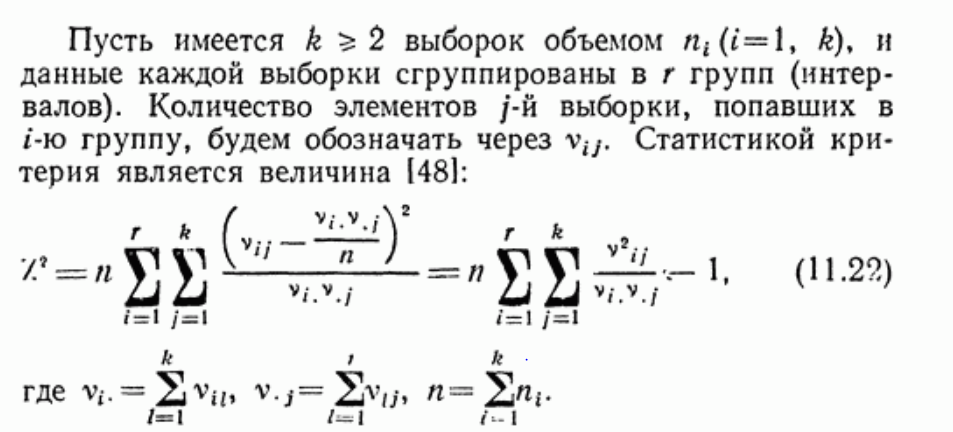

In [17]:
from PIL import Image
im = Image.open("C:/Users/Максим/Desktop/Снимок.PNG")
im

In [13]:
def chi_experiment(distr_tuple):
    XYZ = np.array(distr_tuple)
    
    r = int(20*len(distr_tuple[0])/1000) # обираємо кількість r
    # критичне значення 
    z_gamma = chdtri((r-1)*(len(distr_tuple)-1),gamma)
    # обрані інтервали 
    split_list = np.linspace(0,10,r) # розбиваємо r
    
    nu = []
    for rt in range(0,len(distr_tuple)):
        row_count = []
        for i in range(1,len(split_list)):
            a = XYZ[rt][XYZ[rt] > split_list[i-1]]
            b = XYZ[rt][XYZ[rt] < split_list[i]]
            row_count.append(np.intersect1d(a,b).shape[0])
        nu.append(row_count)
    nu=np.array(nu)
    # number = n + m + k
    number=np.sum([i.shape[0] for i in distr_tuple])
    
    result = []
    #обчислюємо формулу для дельти
    for i in range(0,r-1):
        for j in range(0,len(distr_tuple)):
            result.append( (nu[j,i] - np.sum(nu[:,i])*np.sum(nu[j,:])/number )**2/(np.sum(nu[:,i])*np.sum(nu[j,:])) ) 
    result = np.array(result)
    result = result[~np.isnan(result)]
    # рахуємо дельту
    delta = np.sum(result)*number
    
    if delta > z_gamma:# перевірка гіпотези       
        return ['Cуперечить','delta='+str(delta),'z_gamma='+str(z_gamma)]  
    else:        
        return ['Не суперечить','delta='+str(delta),'z_gamma='+str(z_gamma)] 

```
Преревірка при F_ksi_(u)= 1-exp(-u)
               F_etta_(u)= 1-exp(-u)
               F_zetta_(u)= 1-exp(-1.5u)
```

In [14]:
nmk = [[200,600,400],[2000,6000,4000],[20000,60000,40000]]
for i in nmk:
    X = np.random.exponential(1,size = i[0])
    Y = np.random.exponential(1,size = i[1])
    Z = np.random.exponential(1.5,size = i[2])
    print('n, m, k =', i,chi_experiment((X,Y,Z)))

n, m, k = [200, 600, 400] ['Cуперечить', 'delta=42.116807479224384', 'z_gamma=12.59158724374398']
n, m, k = [2000, 6000, 4000] ['Cуперечить', 'delta=468.25862309278835', 'z_gamma=99.61692732428385']
n, m, k = [20000, 60000, 40000] ['Cуперечить', 'delta=4876.092701942137', 'z_gamma=864.8290830160021']
